In [1]:
import pandas as pd
df = pd.read_csv('../data/BigBasket.csv')

In [2]:
df.head()

,ProductName,Brand,Price,DiscountPrice,Image_Url,Quantity,Category,SubCategory,Absolute_Url
0,Onion (Loose),Fresho,69.75,52.0,https://www.bigbasket.com/media/uploads/p/l/40...,2 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/40075537/fresho-o...
1,Onion,Fresho,174.35,130.0,https://www.bigbasket.com/media/uploads/p/l/12...,5 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/1201414/fresho-on...
2,Onion (Loose),Fresho,34.87,26.0,https://www.bigbasket.com/media/uploads/p/l/10...,1 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/10000148/fresho-o...
3,Onion,Fresho,69.74,52.0,https://www.bigbasket.com/media/uploads/p/l/12...,2 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/1201413/fresho-on...
4,Onion (Loose),Fresho,174.37,129.0,https://www.bigbasket.com/media/uploads/p/l/10...,5 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/10000150/fresho-o...


In [3]:
# Group by Category to count the occurrences
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Counts']

# Check the aggregated data
list(category_counts['Category'])



['Beauty & Hygiene',
 'Kitchen, Garden & Pets',
 'Foodgrains, Oil & Masala',
 'Cleaning & Household',
 'Gourmet & World Food',
 'Snacks & Branded Foods',
 'Eggs, Meat & Fish',
 'Bakery, Cakes & Dairy',
 'Beverages',
 'Baby Care',
 'Fruits & Vegetables']

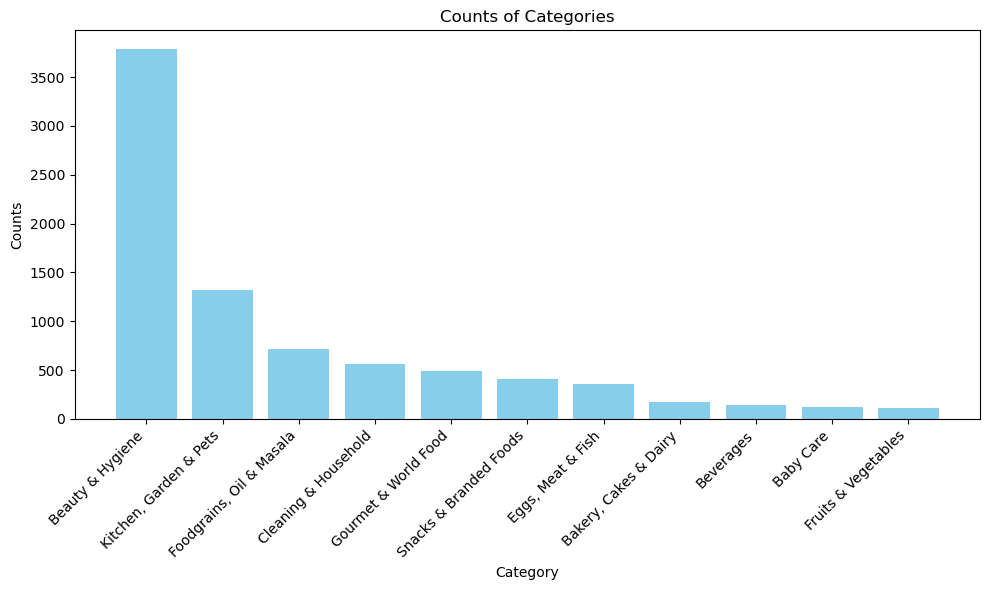

In [4]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(category_counts['Category'], category_counts['Counts'], color='skyblue')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Counts of Categories')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [5]:
# Count the occurrences of each subcategory
subcategory_counts = df['SubCategory'].value_counts().reset_index()
subcategory_counts.columns = ['SubCategory', 'Counts']

subcategory_counts.head()

,SubCategory,Counts
0,Face Care,825
1,Supplements & Proteins,240
2,Face,207
3,Body Care,205
4,Shampoo & Conditioner,201



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


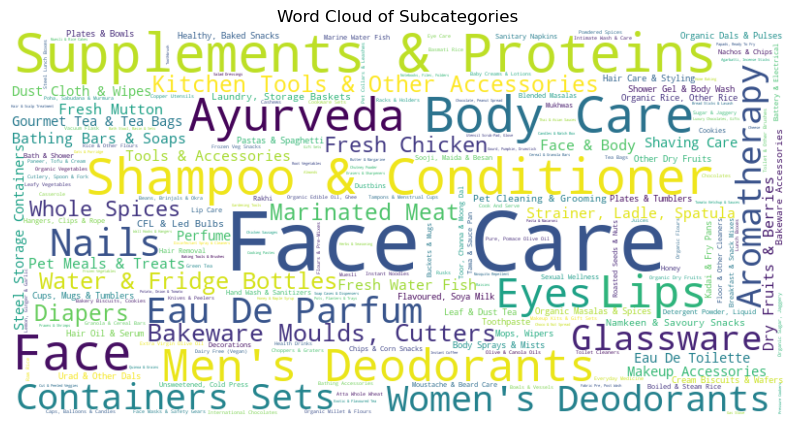

In [6]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert subcategories and counts to a dictionary
subcategory_dict = dict(zip(subcategory_counts['SubCategory'], subcategory_counts['Counts']))

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(subcategory_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Subcategories')
plt.show()


In [7]:
edible_categories = [
    'Foodgrains, Oil & Masala', 
    'Gourmet & World Food', 
    'Snacks & Branded Foods', 
    'Eggs, Meat & Fish', 
    'Bakery, Cakes & Dairy', 
    'Beverages', 
    'Fruits & Vegetables'
]
df['Edible'] = df['Category'].apply(lambda x: 'Edible' if x in edible_categories else 'Not Edible')
df.head()

,ProductName,Brand,Price,DiscountPrice,Image_Url,Quantity,Category,SubCategory,Absolute_Url,Edible
0,Onion (Loose),Fresho,69.75,52.0,https://www.bigbasket.com/media/uploads/p/l/40...,2 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/40075537/fresho-o...,Edible
1,Onion,Fresho,174.35,130.0,https://www.bigbasket.com/media/uploads/p/l/12...,5 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/1201414/fresho-on...,Edible
2,Onion (Loose),Fresho,34.87,26.0,https://www.bigbasket.com/media/uploads/p/l/10...,1 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/10000148/fresho-o...,Edible
3,Onion,Fresho,69.74,52.0,https://www.bigbasket.com/media/uploads/p/l/12...,2 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/1201413/fresho-on...,Edible
4,Onion (Loose),Fresho,174.37,129.0,https://www.bigbasket.com/media/uploads/p/l/10...,5 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/10000150/fresho-o...,Edible


In [8]:
# Calculate the counts of each label in the 'Edible' column
edible_distribution = df['Edible'].value_counts()

# Display the counts
edible_distribution


Edible
Not Edible    5799
Edible        2409
Name: count, dtype: int64

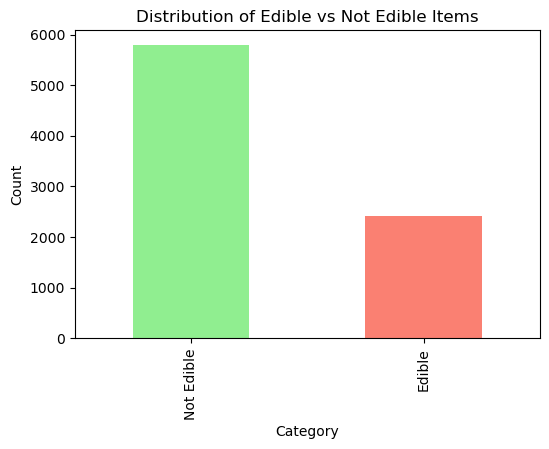

In [9]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(6, 4))
edible_distribution.plot(kind='bar', color=['lightgreen', 'salmon'])

# Add title and labels
plt.title('Distribution of Edible vs Not Edible Items')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()


In [10]:
df

,ProductName,Brand,Price,DiscountPrice,Image_Url,Quantity,Category,SubCategory,Absolute_Url,Edible
0,Onion (Loose),Fresho,69.75,52.0,https://www.bigbasket.com/media/uploads/p/l/40...,2 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/40075537/fresho-o...,Edible
1,Onion,Fresho,174.35,130.0,https://www.bigbasket.com/media/uploads/p/l/12...,5 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/1201414/fresho-on...,Edible
2,Onion (Loose),Fresho,34.87,26.0,https://www.bigbasket.com/media/uploads/p/l/10...,1 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/10000148/fresho-o...,Edible
3,Onion,Fresho,69.74,52.0,https://www.bigbasket.com/media/uploads/p/l/12...,2 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/1201413/fresho-on...,Edible
4,Onion (Loose),Fresho,174.37,129.0,https://www.bigbasket.com/media/uploads/p/l/10...,5 kg,Fruits & Vegetables,"Potato, Onion & Tomato",https://www.bigbasket.com/pd/10000150/fresho-o...,Edible
...,...,...,...,...,...,...,...,...,...,...
8203,"Foil Alphabet Balloon - Letter V, Party Decor,...",Bvishal,49.00,25.0,https://www.bigbasket.com/media/uploads/p/l/40...,1 pc,Cleaning & Household,"Caps, Balloons & Candles",https://www.bigbasket.com/pd/40237020/bvishal-...,Not Edible
8204,"Decoration Balls - Used For Parties, Unique De...",Bvishal,399.00,249.0,https://www.bigbasket.com/media/uploads/p/l/40...,6 pcs,Cleaning & Household,Decorations,https://www.bigbasket.com/pd/40237682/bvishal-...,Not Edible
8205,Foundation Blending Brush - 230,PAC,465.00,232.5,https://www.bigbasket.com/media/uploads/p/l/40...,1 pc,Beauty & Hygiene,Makeup Accessories,https://www.bigbasket.com/pd/40175488/pac-foun...,Not Edible
8206,One Week Immunity Booster,The Healthy Company,799.00,799.0,https://www.bigbasket.com/media/uploads/p/l/40...,28 g,Beauty & Hygiene,Supplements & Proteins,https://www.bigbasket.com/pd/40200885/the-heal...,Not Edible
